# Analyze Data

## Summarize Data

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
from acquire_prepare import acquire_oil
from acquire_prepare import prep_data
import numpy as np
import pandas as pd
import re

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import sys # used in command to make entire array print by default
import seaborn as sns
from scipy.stats import iqr

# Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# makes entire array print by default, can add [:##] to end to set length
np.set_printoptions(threshold=sys.maxsize)

In [4]:
df = acquire_oil()
df = prep_data(df)

### Data Structure

In [5]:
df.shape

(7888, 38)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7888 entries, 30 to 17155
Data columns (total 38 columns):
api14                 7888 non-null int64
lease_name            7888 non-null object
well_number           7888 non-null object
county                7888 non-null object
direction             7888 non-null category
status                7888 non-null category
oper                  7888 non-null object
multi_well_lease      7888 non-null bool
major_phase           7888 non-null category
formation             7888 non-null object
proppant_ppf          7888 non-null float64
prod_method           7888 non-null category
frac_fluid_gpf        7888 non-null float64
gross_perfs           7888 non-null float64
frac_stages           7888 non-null float64
frac_fluid_type       7888 non-null category
first_prod            7888 non-null datetime64[ns]
last_prod             7888 non-null datetime64[ns]
oil_gravity           7888 non-null float64
peak_boepd            7888 non-null float64
oil_his

In [7]:
df.sample(10)

,api14,lease_name,well_number,county,direction,status,oper,multi_well_lease,major_phase,formation,...,mid_point_lat,mid_point_long,sub-basin,recovery,recovery_per_foot,months_active,recovery_per_month,lateral_class,vintage,vintage_bin
12125,42461392990000,XBC GIDDINGS ESTATE F,18H,UPTON,Horizontal,Inactive,pioneer,True,OIL,WOLFCAMP,...,31.436258,-102.012465,Midland,142.631500,22.614793,46,3100.684783,seven,2014,5
4070,42227387520000,GUITAR 8G,3H,HOWARD,Horizontal,Active,encana oil & gas (usa) incorporated,True,OIL,WOLFCAMP,...,32.265633,-101.582784,Midland,114.987010,12.648445,26,4422.577308,ten,2017,5
9180,42383354450000,SAU MARINER 1-2B,2B,REAGAN,Vertical,Inactive,apache,True,OIL,SPRABERRY,...,31.435173,-101.670206,Midland,17.202500,10.805590,13,1323.269231,two,2004,4
4016,42227386110000,MAY 1108,1WA,HOWARD,Horizontal,Active,oxy,False,OIL,WOLFCAMP A,...,32.201888,-101.491768,Midland,580.192826,61.874035,40,14504.820658,ten,2015,5
8230,42383007810001,TXL /C/,1,REAGAN,Vertical,Inactive,hanley petroleum incorporated,False,OIL,DEAN,...,31.629310,-101.761960,Midland,43.391000,157.213768,217,199.958525,one,1977,2
8131,42383005240001,MERCHANT 23,1,REAGAN,Vertical,Inactive,kirkpatrick oil company,False,OIL,DEAN,...,31.552020,-101.604890,Midland,54.729833,297.444746,223,245.425262,one,1971,2
13133,42003408300000,UNIVERSITY 12-36,1H,ANDREWS,Horizontal,Active,white rock oil & gas llc,True,OIL,WICHITA,...,32.212730,-102.821037,Central Platform,40.608835,9.627509,99,410.190250,five,2010,4
4854,42317391960000,SOUTH CURTIS RANCH,2823AH,MARTIN,Horizontal,Active,oxy,True,OIL,WOLFCAMP,...,32.126562,-102.140584,Midland,204.414849,30.725214,47,4349.252103,seven,2015,5
2341,42173370980000,FRIO NS 34-39 02,102H,GLASSCOCK,Horizontal,Inactive,diamondback exploration & prod llc,True,OIL,WOLFCAMP,...,31.680779,-101.454019,Midland,411.108000,59.658685,29,14176.137931,seven,2016,5
2547,42173374080000,G SCHWARTZ 17-8 (ALLOC-H),8NU,GLASSCOCK,Horizontal,Active,laredo petroleum incorporated,True,OIL,WOLFCAMP,...,31.749420,-101.402041,Midland,129.131336,13.491938,28,4611.833411,ten,2016,5


### Data Distributions

In [8]:
print (df.apply(lambda x: x.nunique()))

api14                 7873
lease_name            3543
well_number           3183
county                  38
direction                2
status                   2
oper                   265
multi_well_lease         2
major_phase              3
formation               39
proppant_ppf          7785
prod_method              9
frac_fluid_gpf        7818
gross_perfs           4468
frac_stages             63
frac_fluid_type          9
first_prod             413
last_prod              289
oil_gravity            132
peak_boepd            7693
oil_hist              7773
gas_hist              7769
gor_hist              7879
ip90_boeqpd           7775
tvd                   3952
sur_lat               7682
sur_long              7835
well_id               7881
mid_point_lat         7868
mid_point_long        7872
sub-basin                3
recovery              7874
recovery_per_foot     7880
months_active          336
recovery_per_month    7814
lateral_class           14
vintage                 58
v

In [9]:
df.drop(columns=['api14', 'sur_lat', 'sur_long', 'well_id', 'mid_point_lat', 
                 'mid_point_long', 'tvd']).describe()

,proppant_ppf,frac_fluid_gpf,gross_perfs,frac_stages,oil_gravity,peak_boepd,oil_hist,gas_hist,gor_hist,ip90_boeqpd,recovery,recovery_per_foot,months_active,recovery_per_month,vintage,vintage_bin
count,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000,7888.000000
mean,1129.177020,1142.213462,5732.858773,3.204488,1.862447,508.725133,120.070635,385.288562,3888.944514,349.246186,152.154977,36.226277,60.276242,inf,2011.733266,4.485548
std,656.539972,714.303891,2945.296014,9.336062,9.188722,443.645469,95.660116,387.207769,3815.982884,315.135247,140.362192,61.383543,60.115080,NaN,8.202743,0.780967
min,1.098097,0.354610,4.000000,0.000000,0.000000,0.663017,0.031000,0.001000,0.212134,0.001812,0.013000,0.002991,0.000000,0.590909,1958.000000,1.000000
25%,525.892109,499.423181,4056.250000,0.000000,0.000000,159.810463,46.481500,110.739000,1422.937793,94.906605,57.693208,14.000433,32.000000,1071.903909,2012.000000,4.000000
50%,1156.356260,1222.371400,6242.000000,0.000000,0.000000,429.084519,101.236000,284.305000,2491.502805,292.328796,125.145754,22.247945,49.000000,2688.833781,2014.000000,5.000000
75%,1594.793975,1653.074860,7723.250000,0.000000,0.000000,732.588900,172.310750,542.369000,4906.603828,508.700090,196.330132,36.956724,66.000000,4944.219785,2015.000000,5.000000
max,3969.384520,2997.879640,13581.000000,70.000000,68.000000,6118.757000,754.662000,4007.768000,19968.130000,4752.926000,999.305470,997.824074,726.000000,inf,2018.000000,5.000000


## Standardize Numeric Data

In [10]:
numerics = ['int64', 'float64', 'float']

num_df = df.select_dtypes(include=numerics)
num_df.columns

Index(['api14', 'proppant_ppf', 'frac_fluid_gpf', 'gross_perfs', 'frac_stages',
       'oil_gravity', 'peak_boepd', 'oil_hist', 'gas_hist', 'gor_hist',
       'ip90_boeqpd', 'tvd', 'sur_lat', 'sur_long', 'well_id', 'mid_point_lat',
       'mid_point_long', 'recovery', 'recovery_per_foot', 'months_active',
       'recovery_per_month', 'vintage', 'vintage_bin'],
      dtype='object')

In [11]:
num_df = num_df.drop(columns=['gas_hist', 'recovery_per_foot', 
                              'recovery_per_month', 'api14',
#                              'landing_depth', sur_long', 'sur_lat', 'mid_point_lat', 'mid_point_long',
                             'well_id', 'oil_hist'])

### Use LabelEncoder to encode county, frac_fluid_type, oper, type, and formation.

In [12]:
df.select_dtypes(exclude=numerics).columns

Index(['lease_name', 'well_number', 'county', 'direction', 'status', 'oper',
       'multi_well_lease', 'major_phase', 'formation', 'prod_method',
       'frac_fluid_type', 'first_prod', 'last_prod', 'sub-basin',
       'lateral_class'],
      dtype='object')

In [71]:
# Not encoding: 'index', 'lease_name', 'well_number', 'status',
#               'multi_well_lease', 'major_phase', 'prod_method',
#               'first_prod', 'last_prod'

for col in ['county', 'direction', 'oper', 'formation', 'frac_fluid_type', 
            'sub-basin', 'lateral_class']:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    num_df[col] = encoder.transform(df[col])
num_df.sample(5)

,proppant_ppf,frac_fluid_gpf,gross_perfs,frac_stages,oil_gravity,peak_boepd,gor_hist,ip90_boeqpd,tvd,sur_lat,...,months_active,vintage,vintage_bin,county,direction,oper,formation,frac_fluid_type,sub-basin,lateral_class
15472,599.361500,505.25700,5012.0,0.0,0.0,567.14830,1530.10620,425.498200,5272.0,33.166592,...,24,2017,5,37,0,220,21,3,0,8
15239,626.495200,1163.70618,4431.0,0.0,0.0,187.30513,643.40640,111.056778,3176.0,31.304654,...,59,2014,5,34,0,38,21,7,0,2
8699,127.607361,73.61963,815.0,1.0,0.0,37.24404,2818.19971,34.304028,0.0,31.461380,...,174,1981,2,26,1,20,6,5,2,6
12316,1116.274410,1523.90308,9899.0,0.0,0.0,1249.93018,4472.33740,897.121400,9325.0,31.649170,...,41,2015,5,34,0,263,29,3,2,9
59,1417.040530,1602.77576,10172.0,68.0,0.0,573.13190,1248.46521,368.958344,8937.0,32.354651,...,36,2016,5,0,0,166,24,3,2,1


## Scale the data:

In [14]:
scaled_df = num_df.copy()
scaled_df['proppant_ppf'] = (scaled_df.proppant_ppf - scaled_df.proppant_ppf.min()) / (scaled_df.proppant_ppf.max() - scaled_df.proppant_ppf.min())
scaled_df['frac_fluid_gpf'] = (scaled_df.frac_fluid_gpf - scaled_df.frac_fluid_gpf.min()) / (scaled_df.frac_fluid_gpf.max() - scaled_df.frac_fluid_gpf.min())
scaled_df['gross_perfs'] = (scaled_df.gross_perfs - scaled_df.gross_perfs.min()) / (scaled_df.gross_perfs.max() - scaled_df.gross_perfs.min())
scaled_df['frac_stages'] = (scaled_df.frac_stages - scaled_df.frac_stages.min()) / (scaled_df.frac_stages.max() - scaled_df.frac_stages.min())
scaled_df['oil_gravity'] = (scaled_df.oil_gravity - scaled_df.oil_gravity.min()) / (scaled_df.oil_gravity.max() - scaled_df.oil_gravity.min())
scaled_df['peak_boepd'] = (scaled_df.peak_boepd - scaled_df.peak_boepd.min()) / (scaled_df.peak_boepd.max() - scaled_df.peak_boepd.min())
scaled_df['gor_hist'] = (scaled_df.gor_hist - scaled_df.gor_hist.min()) / (scaled_df.gor_hist.max() - scaled_df.gor_hist.min())
scaled_df['ip90_boeqpd'] = (scaled_df.ip90_boeqpd - scaled_df.ip90_boeqpd.min()) / (scaled_df.ip90_boeqpd.max() - scaled_df.ip90_boeqpd.min())
scaled_df['months_active'] = (scaled_df.months_active - scaled_df.months_active.min()) / (scaled_df.months_active.max() - scaled_df.months_active.min())
scaled_df['vintage'] = (scaled_df.vintage - scaled_df.vintage.min()) / (scaled_df.vintage.max() - scaled_df.vintage.min())
scaled_df['county'] = (scaled_df.county - scaled_df.county.min()) / (scaled_df.county.max() - scaled_df.county.min())
scaled_df['frac_fluid_type'] = (scaled_df.frac_fluid_type - scaled_df.frac_fluid_type.min()) / (scaled_df.frac_fluid_type.max() - scaled_df.frac_fluid_type.min())
scaled_df['oper'] = (scaled_df.oper - scaled_df.oper.min()) / (scaled_df.oper.max() - scaled_df.oper.min())
scaled_df['direction'] = (scaled_df.direction - scaled_df.direction.min()) / (scaled_df.direction.max() - scaled_df.direction.min())
scaled_df['formation'] = (scaled_df.formation - scaled_df.formation.min()) / (scaled_df.formation.max() - scaled_df.formation.min())
scaled_df['tvd'] = (scaled_df.tvd - scaled_df.tvd.min()) / (scaled_df.tvd.max() - scaled_df.tvd.min())
scaled_df['sur_lat'] = (scaled_df.sur_lat - scaled_df.sur_lat.min()) / (scaled_df.sur_lat.max() - scaled_df.sur_lat.min())
scaled_df['sur_long'] = (scaled_df.sur_long - scaled_df.sur_long.min()) / (scaled_df.sur_long.max() - scaled_df.sur_long.min())
scaled_df['mid_point_lat'] = (scaled_df.mid_point_lat - scaled_df.mid_point_lat.min()) / (scaled_df.mid_point_lat.max() - scaled_df.mid_point_lat.min())
scaled_df['mid_point_long'] = (scaled_df.mid_point_long - scaled_df.mid_point_long.min()) / (scaled_df.mid_point_long.max() - scaled_df.mid_point_long.min())
scaled_df['sub-basin'] = (scaled_df['sub-basin'] - scaled_df['sub-basin'].min()) / (scaled_df['sub-basin'].max() - scaled_df['sub-basin'].min())
scaled_df['lateral_class'] = (scaled_df.lateral_class - scaled_df.lateral_class.min()) / (scaled_df.lateral_class.max() - scaled_df.lateral_class.min())

scaled_df['recovery'] = (scaled_df.recovery - scaled_df.recovery.min()) / (scaled_df.recovery.max() - scaled_df.recovery.min())
scaled_df.rename(index=str, columns={"oper": "operator"}, inplace=True)

In [15]:
scaled_df.sample(10)

,proppant_ppf,frac_fluid_gpf,gross_perfs,frac_stages,oil_gravity,peak_boepd,gor_hist,ip90_boeqpd,tvd,sur_lat,...,months_active,vintage,vintage_bin,county,direction,operator,formation,frac_fluid_type,sub-basin,lateral_class
11330,0.435598,0.586008,0.840539,0.014286,0.0,0.080650,0.172225,0.050577,0.536102,0.254309,...,0.009642,0.983333,5,0.702703,0.0,0.253788,0.763158,0.375,1.0,0.923077
7515,0.387690,0.423478,0.320689,0.000000,0.0,0.154172,0.062703,0.152631,0.696367,0.471530,...,0.048209,0.966667,5,0.621622,0.0,0.196970,0.631579,0.875,1.0,0.153846
424,0.196428,0.285135,0.578847,0.000000,0.0,0.075881,0.887404,0.069468,0.467024,0.192710,...,0.097796,0.916667,4,0.162162,0.0,0.738636,0.763158,0.875,1.0,0.000000
3490,0.212483,0.000955,0.056935,0.000000,0.0,0.045491,0.486463,0.038296,0.000000,0.554332,...,0.037190,0.700000,3,0.405405,1.0,0.973485,0.763158,0.250,1.0,0.461538
15973,0.094513,0.088241,0.327097,0.157143,0.0,0.061242,0.070558,0.077057,0.845913,0.390100,...,0.097796,0.916667,4,0.513514,0.0,0.250000,0.052632,0.375,0.5,0.153846
7436,0.313977,0.618173,0.530088,0.000000,0.0,0.095273,0.050572,0.111978,0.694432,0.469868,...,0.053719,0.950000,5,0.621622,0.0,0.250000,0.631579,0.875,1.0,0.000000
1995,0.303997,0.549381,0.486484,0.000000,0.0,0.175321,0.491287,0.124506,0.592154,0.380190,...,0.074380,0.933333,5,0.351351,0.0,0.250000,0.763158,0.375,1.0,0.538462
17149,0.285349,0.595101,0.261324,0.000000,0.0,0.115569,0.146847,0.007364,0.563868,0.443818,...,0.071625,0.933333,5,0.972973,0.0,0.094697,0.763158,0.000,0.5,0.230769
15519,0.041002,0.081786,0.367681,0.142857,0.0,0.031135,0.064413,0.035719,0.657362,0.792617,...,0.148760,0.866667,4,0.054054,0.0,0.484848,0.763158,0.875,0.5,0.153846
4284,0.322389,0.537495,0.521323,0.485714,0.0,0.067523,0.392212,0.075127,0.488685,0.196126,...,0.073003,0.933333,5,0.432432,0.0,0.295455,0.763158,0.875,1.0,0.000000


## Visualize Data

### Attribute Histograms

In [16]:
xgb_df = scaled_df.drop(columns=['recovery']).copy()

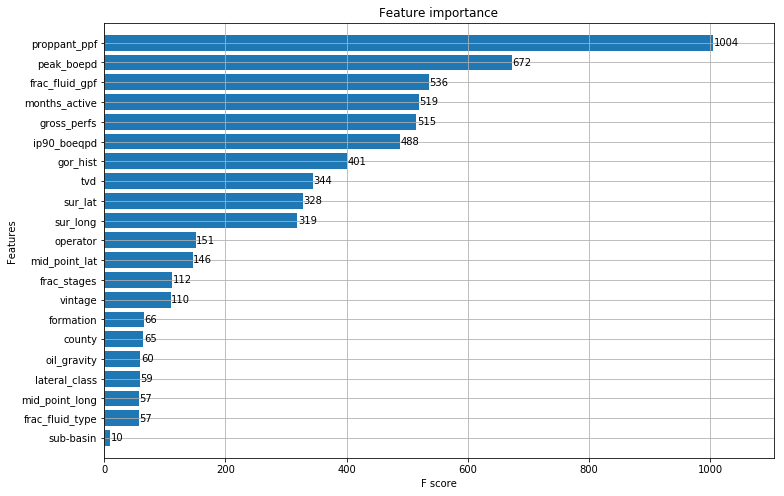

In [17]:
xgb_params = {
    'max_depth': 8,
    'seed' : 493
}
dtrain = xgb.DMatrix(xgb_df, df.recovery, feature_names=xgb_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

#### key features:
'proppant_ppf', 'peak_boepd', 'gor_hist', 'gross_perfs', 'frac_fluid_gpf', 'months_active', 'ip90_boeqpd', 'sur_lat', 'tvd', 'sur_long'

In [18]:
df.columns

Index(['api14', 'lease_name', 'well_number', 'county', 'direction', 'status',
       'oper', 'multi_well_lease', 'major_phase', 'formation', 'proppant_ppf',
       'prod_method', 'frac_fluid_gpf', 'gross_perfs', 'frac_stages',
       'frac_fluid_type', 'first_prod', 'last_prod', 'oil_gravity',
       'peak_boepd', 'oil_hist', 'gas_hist', 'gor_hist', 'ip90_boeqpd', 'tvd',
       'sur_lat', 'sur_long', 'well_id', 'mid_point_lat', 'mid_point_long',
       'sub-basin', 'recovery', 'recovery_per_foot', 'months_active',
       'recovery_per_month', 'lateral_class', 'vintage', 'vintage_bin'],
      dtype='object')

### Pairwise Scatterplots of Attributes

In [19]:
scaled_df.shape

(7888, 24)

#### Plotting actual numbers (not scaled).

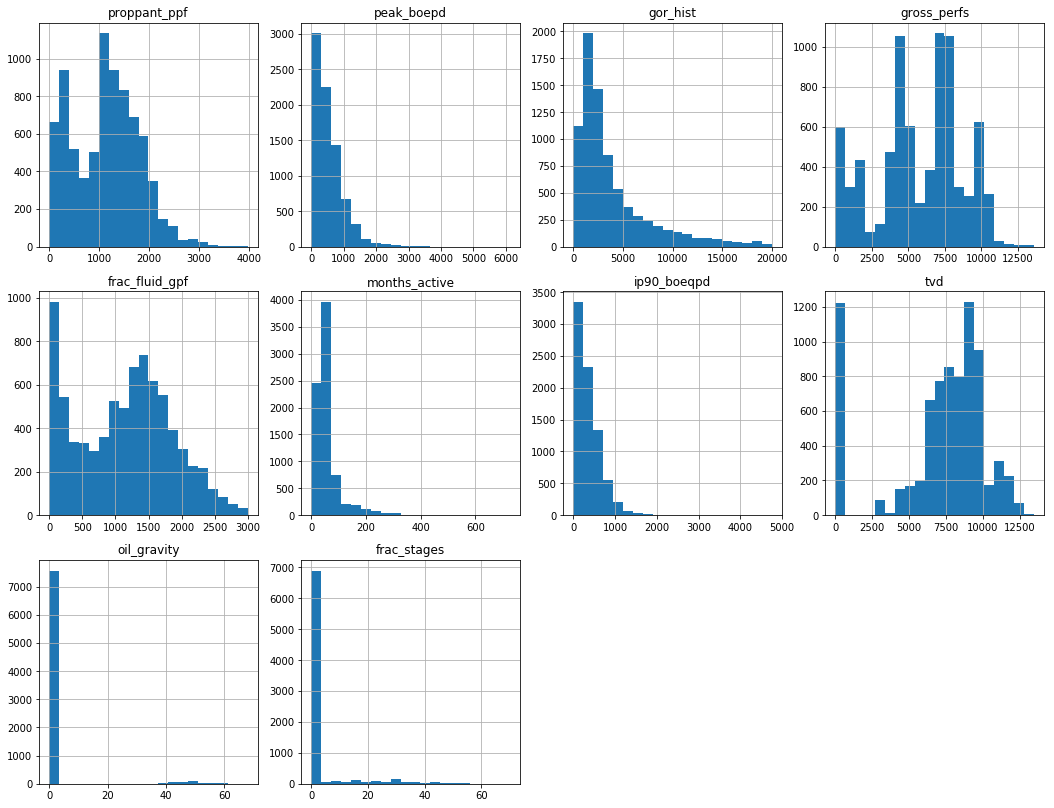

In [31]:
# Did not plot:
#        'sur_lat', 'sur_long', 'well_id', 'mid_point_lat', 'mid_point_long',
#        'recovery', 'recovery_per_foot', 'recovery_per_month', 'lateral_class', 
#        'vintage', 'vintage_bin', 'prod_method', 'oil_hist', 'gas_hist', 'frac_fluid_type',
#        'first_prod','last_prod', 'direction', 'status', 'oper', 'multi_well_lease',
#        'major_phase', 'formation', 'sub-basin'


X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'gross_perfs', 
          'frac_fluid_gpf', 'months_active', 'ip90_boeqpd', 'tvd',
          'oil_gravity', 'frac_stages']

plt.figure(figsize=(18,14))
for i, col in enumerate(X_vars):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = scaled_df[col]
    plt.subplot(3, 4, plot_number)
    plt.title(col)
    df[col].hist(bins=20)

#### Plotting scaled numbers on box and whiskers to check distribution.

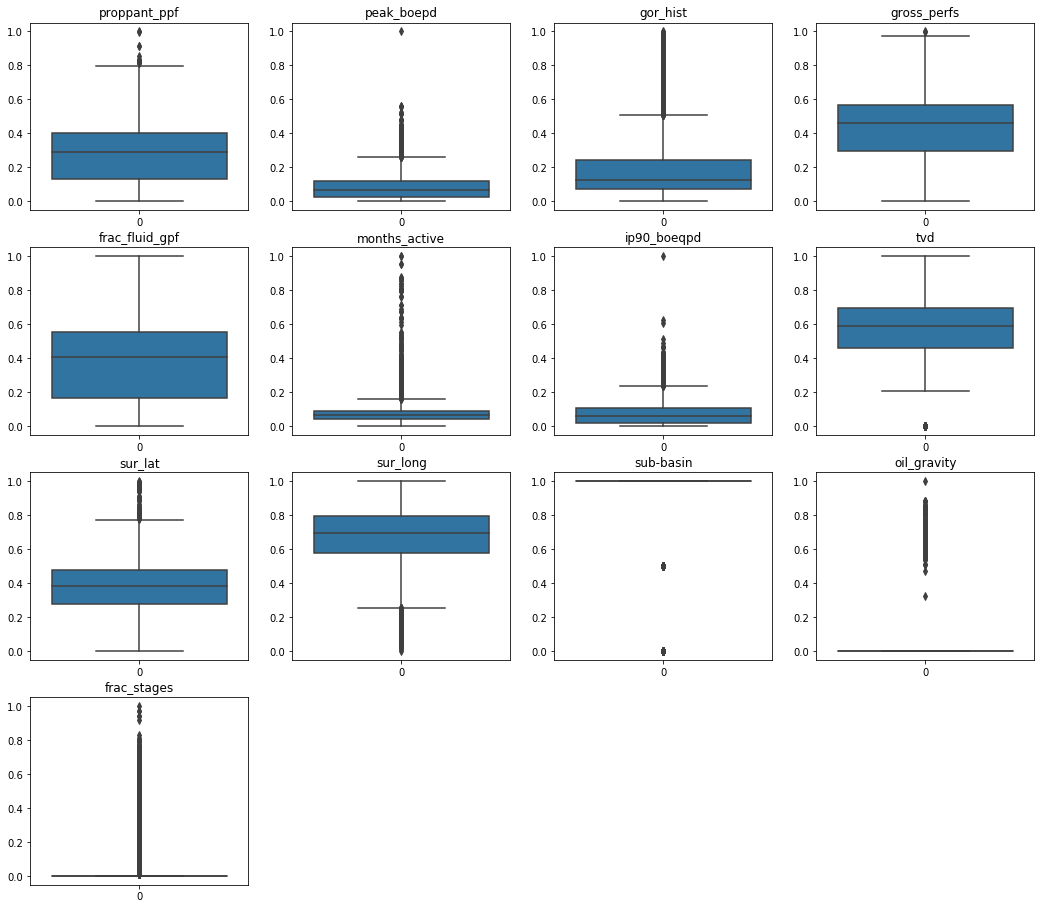

In [43]:
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'gross_perfs', 
          'frac_fluid_gpf', 'months_active', 'ip90_boeqpd', 'tvd',
          'sur_lat', 'sur_long', 'sub-basin', 'oil_gravity', 
          'frac_stages']

plt.figure(figsize=(18,20))
for plot_num, col in enumerate(X_vars):  
    plt.subplot(5, 4, plot_num + 1)
    plt.title(col)
    sns.boxplot(data=scaled_df[col]) 

# There are still a lot of outliers, but this may decrease as we group by sub-basin.

#### Create a jointplot for each independent variable (normalized version) with the dependent variable.

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local

<Figure size 1296x1008 with 0 Axes>

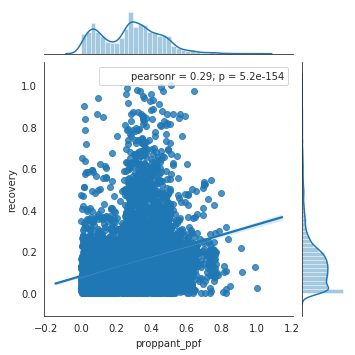

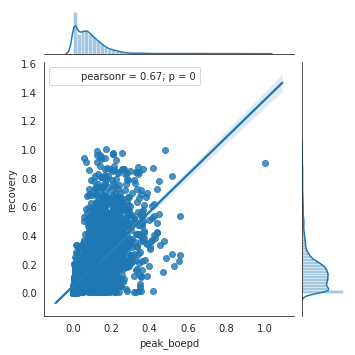

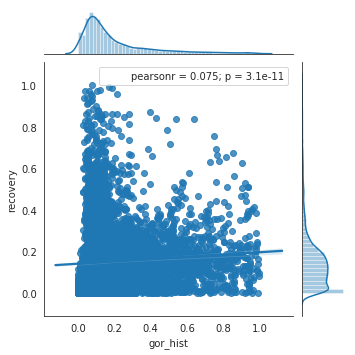

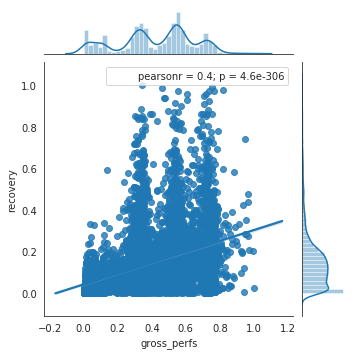

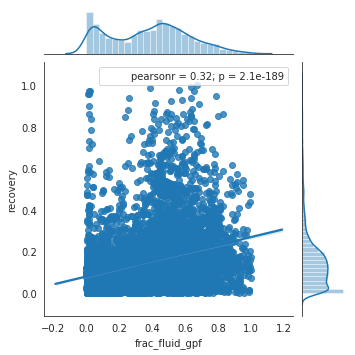

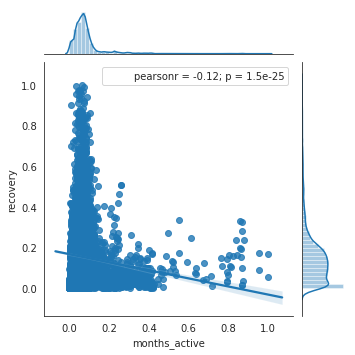

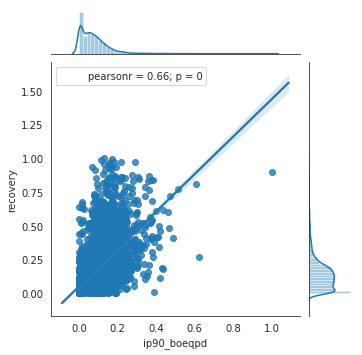

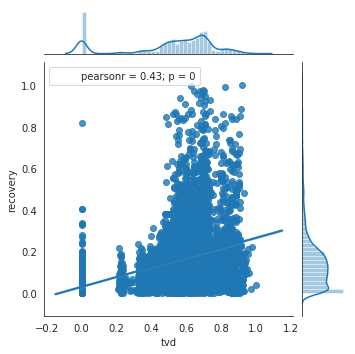

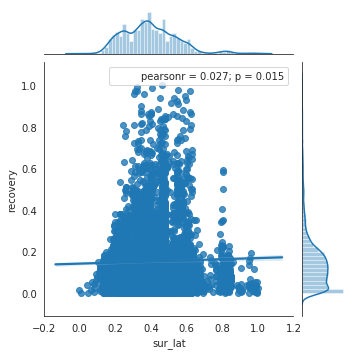

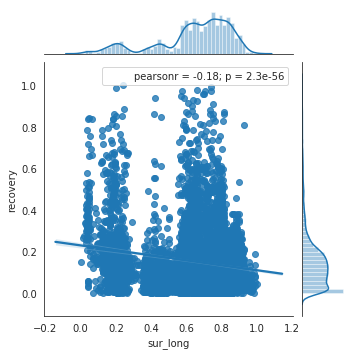

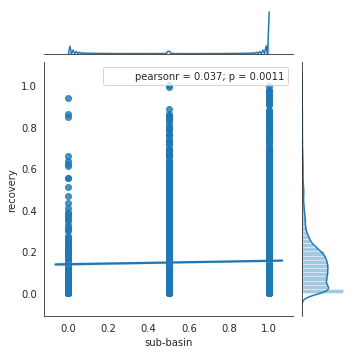

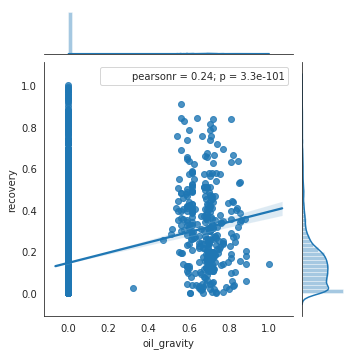

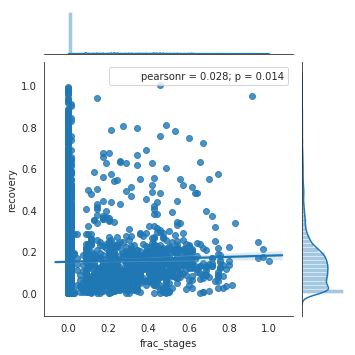

In [44]:
plt.figure(figsize=(18,14))

with sns.axes_style('white'):
    for i, col in enumerate(X_vars):  
        j = sns.jointplot(col, 'recovery', data=scaled_df, kind='reg', height=5);
        j.annotate(stats.pearsonr)

plt.show()

### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent).

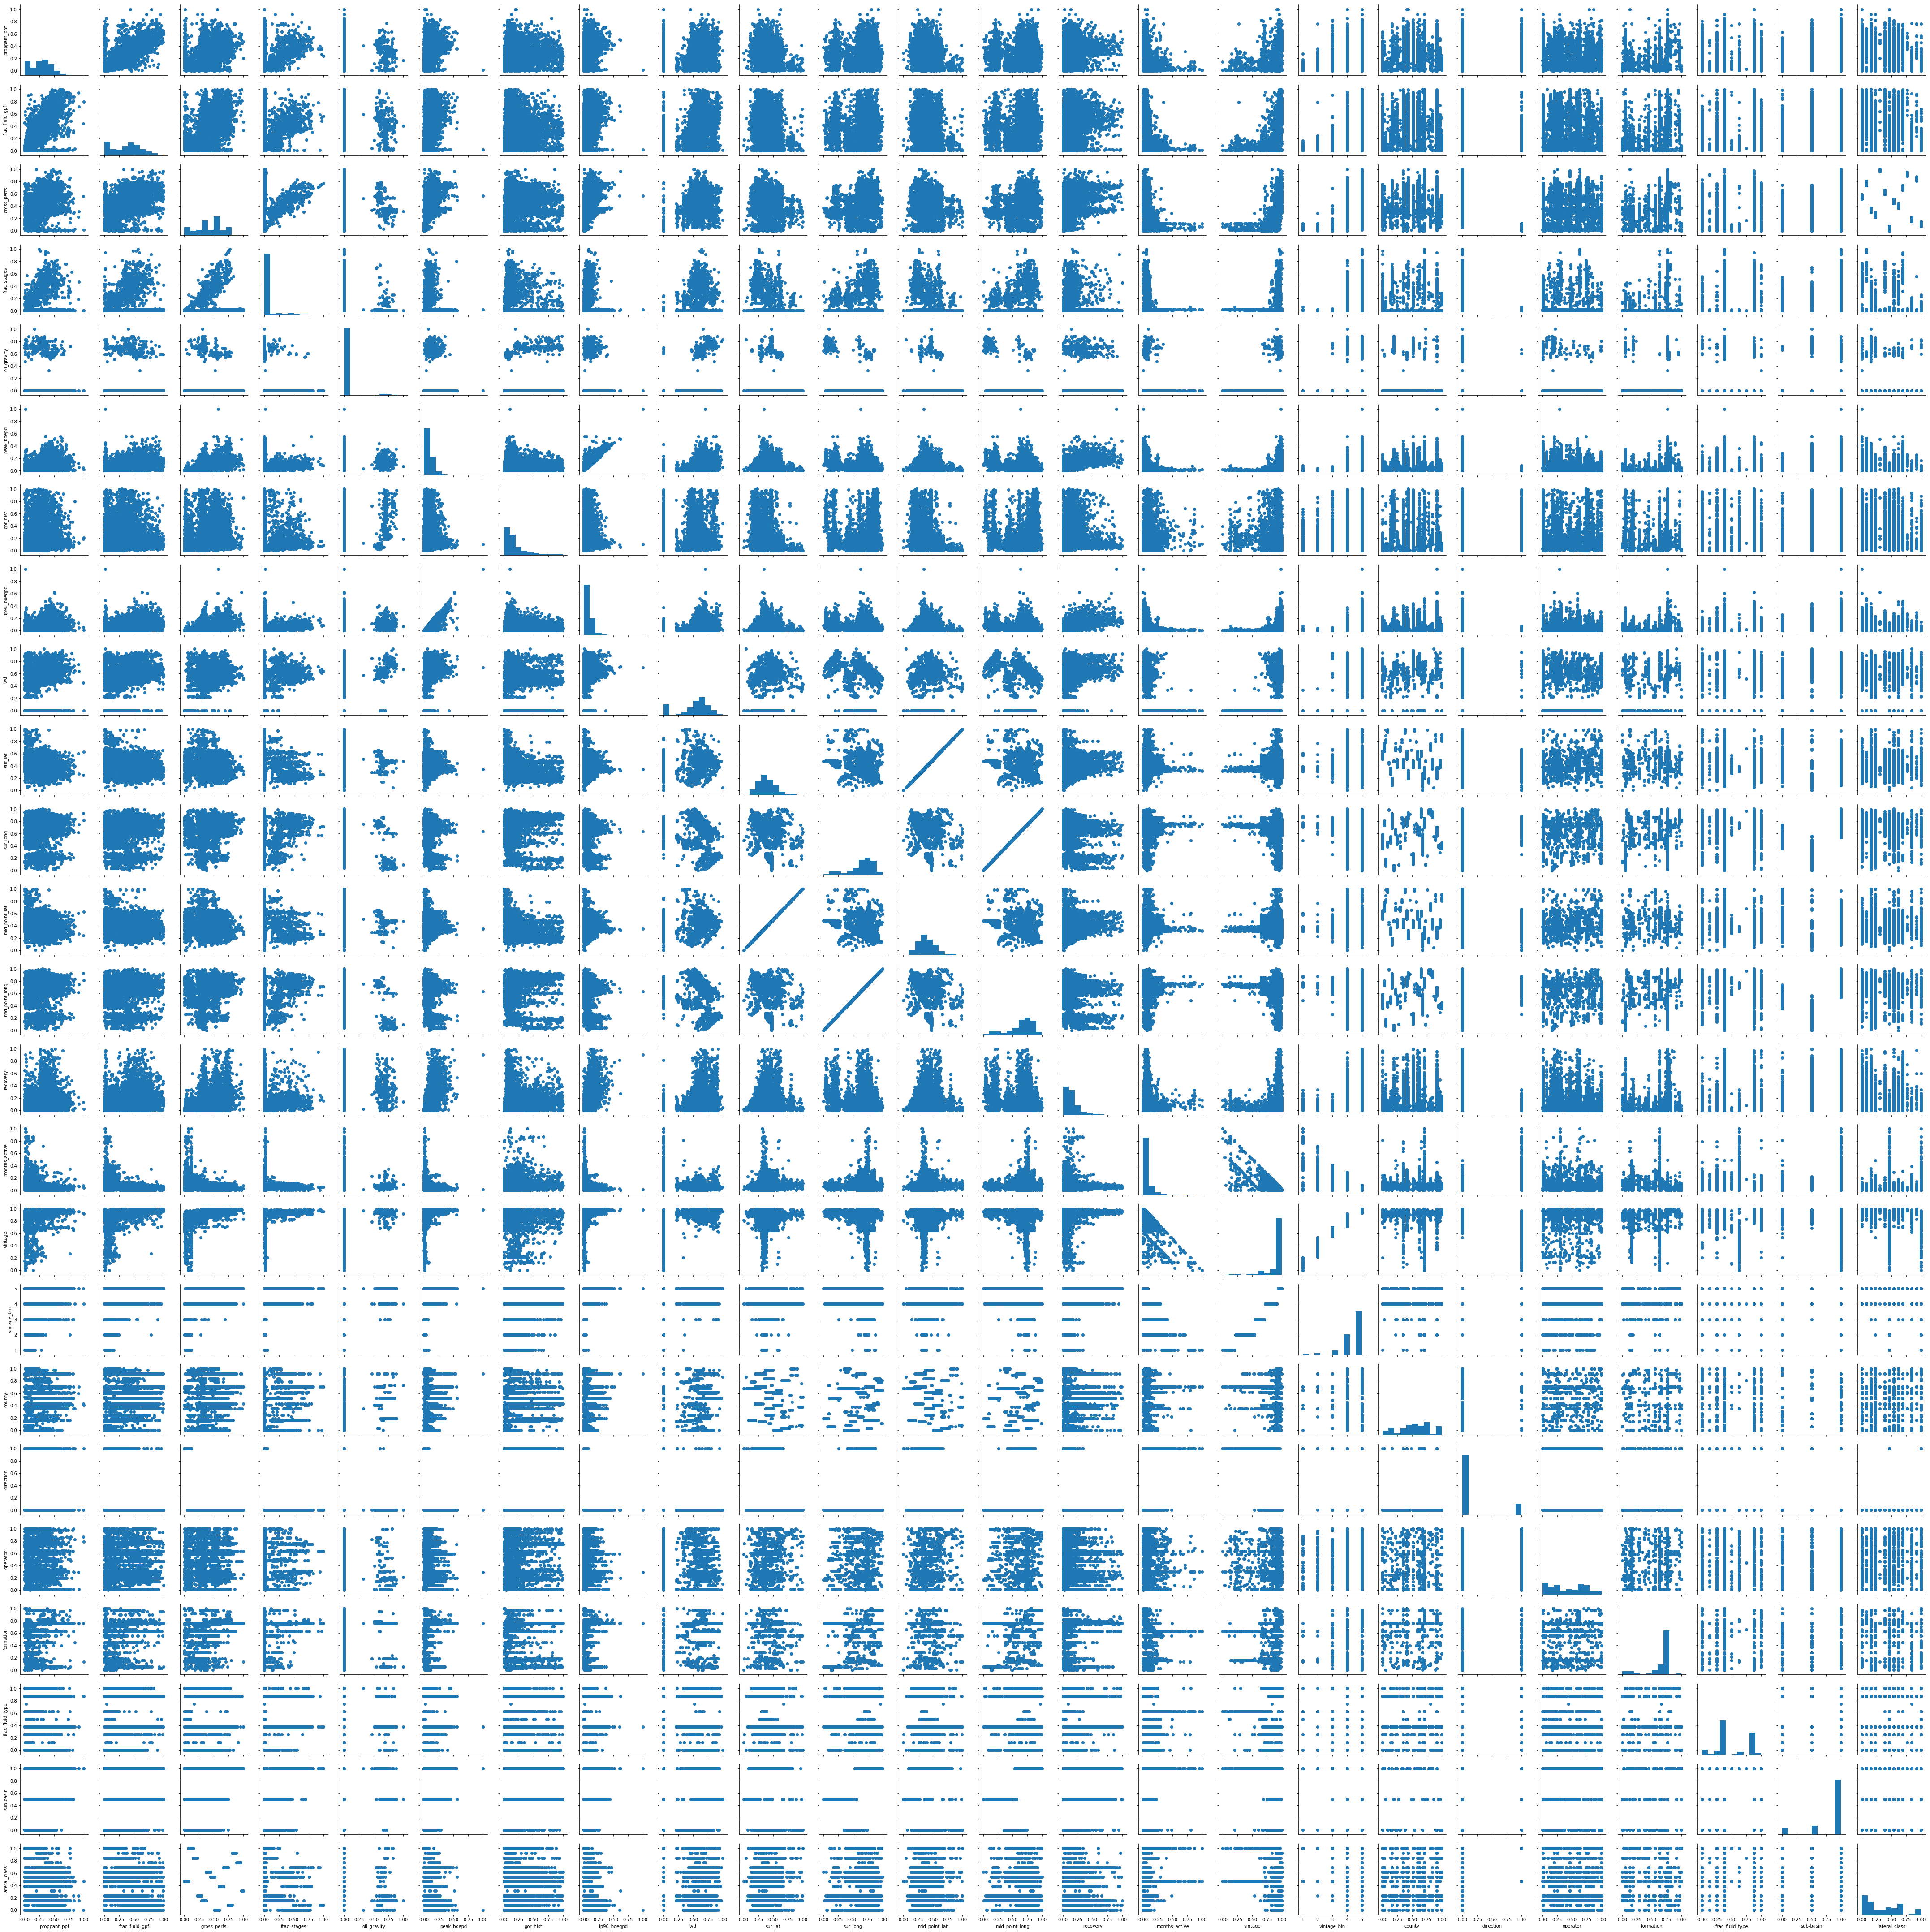

In [45]:
g = sns.PairGrid(scaled_df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

#### Create a heatmap of the correlation between each variable pair.

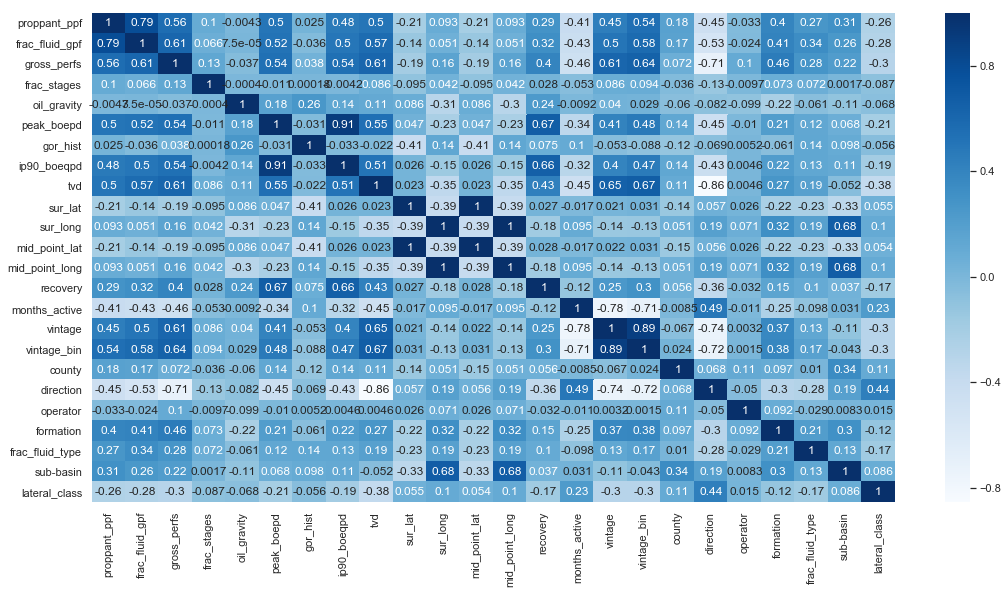

In [51]:
plt.figure(figsize=(18,9))

sns.heatmap(scaled_df.corr(), cmap='Blues', annot=True)

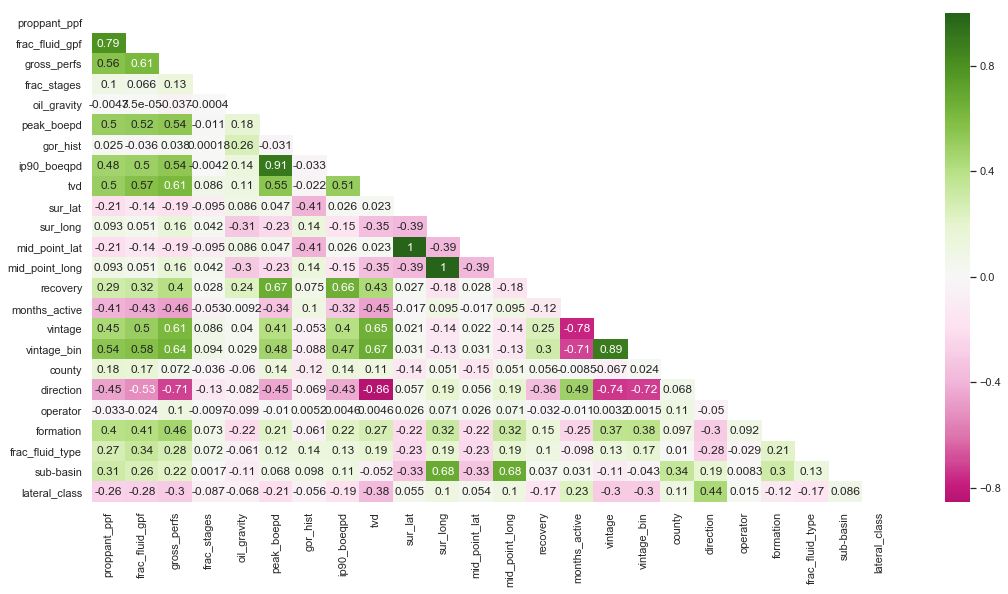

In [50]:
sns.set(style="white")

# Compute the correlation matrix
corr = scaled_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='PiYG', annot=True, center=0)

## So xgboost is showing proppant_ppf as a primer feature. However, it has only a .29 correlation with recovery.
## peak_boepd has the highest correlation with recovery at .67.
## ip90_boeqpd comes in second with a .66 correlation with recovery.
## tvd comes in third with only a .43 correlation with recovery.
## gross_perfs comes in fourth with only as .4 correlation with recovery.
## We still have a lot of outliers. I wonder if they are messing with these results.

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 1296x1008 with 0 Axes>

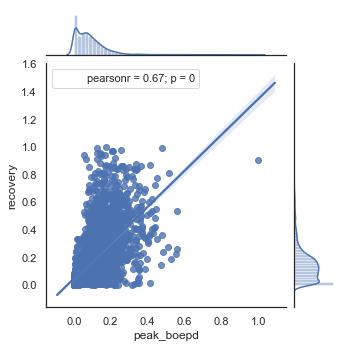

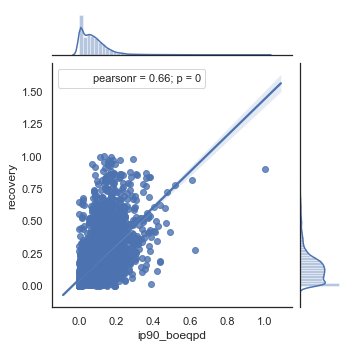

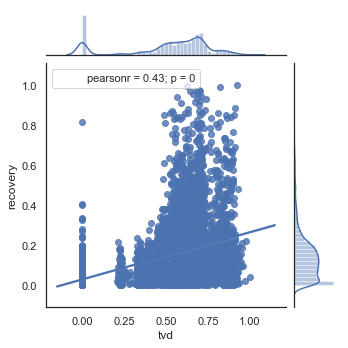

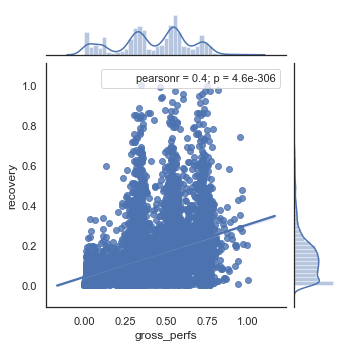

In [52]:
high_corr = ['peak_boepd', 'ip90_boeqpd', 'tvd', 'gross_perfs']
plt.figure(figsize=(18,14))

with sns.axes_style('white'):
    for i, col in enumerate(high_corr):  
        j = sns.jointplot(col, 'recovery', data=scaled_df, kind='reg', height=5);
        j.annotate(stats.pearsonr)

plt.show()

## We might see more patterns in peak_boepd and ip90_boeqpd if we drop more outliers.
## The lateral_len is in clusters that are likely created by how many sections of land are purchased.

#### Use statsmodels ordinary least squares to assess the importance of each feature with respect to the target.

#### Create train_test_split for OLS.

#### FIRST TRY:

In [55]:
# Independent variables:
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf', 
          'months_active', 'gross_perfs', 'ip90_boeqpd', 'county']

# Dependent (target) variable, it is continuous
target = ['recovery']

X = scaled_df[X_vars].copy()                                                    
y = scaled_df[['recovery']]

In [56]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [57]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [58]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               recovery   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     2604.
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:22:45   Log-Likelihood:                 5634.5
No. Observations:                6310   AIC:                        -1.125e+04
Df Residuals:                    6302   BIC:                        -1.120e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
proppant_ppf      -0.0585      0.013     -4.632      0.000      -0.083      -0.034
peak_boepd         0.9357      0.044     21.268      0.000       0.849       1.022
gor_hist           0.0600      0.006      9.248      0.000       0.047       0.073
frac_fluid_gpf     0.0034      0.009      0.364      0.716      -0.015       0.021
months_active      0.2321      0.015     15.747      0.000       0.203       0.261
gross_perfs        0.0711      0.007      9.716      0.000       0.057       0.085
ip90_boeqpd        0.4913      0.047     10.367      0.000       0.398       0.584
county            -0.0145      0.004     -3.235      0.001      -0.023      -0.006
==============================================================================
Omnibus:                     3165.995   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44887.799
Skew:                           2.053   Prob(JB):                         0.00
Kurtosis:                      15.404   Cond. No.                         45.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# We might be able to improve these numbers by dropping some features.
#### SECOND TRY:

In [59]:
# Independent variables:
X_vars = ['proppant_ppf', 'frac_fluid_gpf', 
          'months_active', 'gross_perfs', 'county']

# Dependent (target) variable, it is continuous
target = ['recovery']

X = scaled_df[X_vars].copy()                                                    
y = scaled_df[['recovery']]

In [60]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [61]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [62]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               recovery   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     2088.
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:22:58   Log-Likelihood:                 4110.2
No. Observations:                6310   AIC:                            -8210.
Df Residuals:                    6305   BIC:                            -8177.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
proppant_ppf       0.0383      0.016      2.421      0.016       0.007       0.069
frac_fluid_gpf     0.0619      0.012      5.313      0.000       0.039       0.085
months_active      0.1969      0.018     11.127      0.000       0.162       0.232
gross_perfs        0.2347      0.009     27.493      0.000       0.218       0.251
county             0.0030      0.006      0.518      0.604      -0.008       0.014
==============================================================================
Omnibus:                     3258.975   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24686.192
Skew:                           2.378   Prob(JB):                         0.00
Kurtosis:                      11.442   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### THIRD TRY:

In [63]:
# Independent variables:
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf']

# Dependent (target) variable, it is continuous
target = ['recovery']

X = scaled_df[X_vars].copy()                                                    
y = scaled_df[['recovery']]

In [64]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [65]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [66]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               recovery   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     4688.
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:23:05   Log-Likelihood:                 5381.5
No. Observations:                6310   AIC:                        -1.076e+04
Df Residuals:                    6306   BIC:                        -1.073e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
proppant_ppf      -0.0248      0.013     -1.960      0.050      -0.050   -6.37e-07
peak_boepd         1.4006      0.021     66.137      0.000       1.359       1.442
gor_hist           0.1162      0.006     19.171      0.000       0.104       0.128
frac_fluid_gpf     0.0325      0.009      3.592      0.000       0.015       0.050
==============================================================================
Omnibus:                     2733.379   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37561.398
Skew:                           1.700   Prob(JB):                         0.00
Kurtosis:                      14.459   Cond. No.                         9.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

FOURTH TRY:

In [67]:
# Independent variables:
X_vars = ['gor_hist', 'frac_fluid_gpf', 'months_active', 'gross_perfs']

# Dependent (target) variable, it is continuous
target = ['recovery']

X = scaled_df[X_vars].copy()                                                    
y = scaled_df[['recovery']]

In [68]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [69]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [70]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               recovery   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2625.
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:23:19   Log-Likelihood:                 4120.9
No. Observations:                6310   AIC:                            -8234.
Df Residuals:                    6306   BIC:                            -8207.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gor_hist           0.0435      0.008      5.330      0.000       0.027       0.059
frac_fluid_gpf     0.0829      0.008     10.151      0.000       0.067       0.099
months_active      0.1735      0.017     10.514      0.000       0.141       0.206
gross_perfs        0.2300      0.008     27.862      0.000       0.214       0.246
==============================================================================
Omnibus:                     3301.580   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25709.745
Skew:                           2.407   Prob(JB):                         0.00
Kurtosis:                      11.638   Cond. No.                         7.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

FIFTH TRY:

In [73]:
CP_df = scaled_df[(scaled_df['sub-basin'] == 0)]
CP_df.sample(5)

,proppant_ppf,frac_fluid_gpf,gross_perfs,frac_stages,oil_gravity,peak_boepd,gor_hist,ip90_boeqpd,tvd,sur_lat,...,months_active,vintage,vintage_bin,county,direction,operator,formation,frac_fluid_type,sub-basin,lateral_class
13254,0.139150,0.376941,0.360463,0.0,0.0,0.046264,0.221655,0.013342,0.519949,0.549695,...,0.084022,0.933333,5,0.000000,0.0,0.011364,0.736842,0.375,0.0,0.153846
13610,0.038020,0.036731,0.317891,0.0,0.0,0.025697,0.049402,0.030158,0.232247,0.315819,...,0.130854,0.883333,4,0.135135,0.0,0.011364,0.289474,0.000,0.0,0.153846
13905,0.022106,0.243472,0.168668,0.0,0.0,0.016011,0.119120,0.020076,0.432038,0.423441,...,0.128099,0.883333,4,0.243243,0.0,0.011364,0.710526,0.375,0.0,0.846154
13229,0.281638,0.393875,0.363261,0.0,0.0,0.033861,0.036211,0.031951,0.733735,0.587241,...,0.088154,0.916667,4,0.000000,0.0,0.196970,0.763158,0.375,0.0,0.153846
13885,0.054225,0.123247,0.242763,0.0,0.0,0.018761,0.084465,0.022039,0.631457,0.381355,...,0.177686,0.833333,4,0.243243,0.0,0.310606,0.184211,0.250,0.0,0.230769


In [74]:
scaled_df.columns

Index(['proppant_ppf', 'frac_fluid_gpf', 'gross_perfs', 'frac_stages',
       'oil_gravity', 'peak_boepd', 'gor_hist', 'ip90_boeqpd', 'tvd',
       'sur_lat', 'sur_long', 'mid_point_lat', 'mid_point_long', 'recovery',
       'months_active', 'vintage', 'vintage_bin', 'county', 'direction',
       'operator', 'formation', 'frac_fluid_type', 'sub-basin',
       'lateral_class'],
      dtype='object')

In [79]:
# Independent variables:
X_vars = ['proppant_ppf', 'frac_fluid_gpf', 'gor_hist', 'months_active', 'ip90_boeqpd', 'tvd', 'mid_point_lat', 'mid_point_long', 'operator']

# Dependent (target) variable, it is continuous
target = ['recovery']

X = scaled_df[X_vars].copy()                                                    
y = scaled_df[['recovery']]

In [80]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [81]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [82]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               recovery   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     2211.
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:48:59   Log-Likelihood:                 5524.1
No. Observations:                6310   AIC:                        -1.103e+04
Df Residuals:                    6301   BIC:                        -1.097e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
proppant_ppf      -0.0302      0.013     -2.326      0.020      -0.056      -0.005
frac_fluid_gpf     0.0043      0.009      0.455      0.649      -0.014       0.023
gor_hist           0.0754      0.007     10.756      0.000       0.062       0.089
months_active      0.2309      0.017     13.717      0.000       0.198       0.264
ip90_boeqpd        1.3093      0.024     55.323      0.000       1.263       1.356
tvd                0.0916      0.006     14.108      0.000       0.079       0.104
mid_point_lat      0.0225      0.008      2.987      0.003       0.008       0.037
mid_point_long    -0.0317      0.005     -5.974      0.000      -0.042      -0.021
operator          -0.0160      0.004     -3.707      0.000      -0.024      -0.008
==============================================================================
Omnibus:                     3347.325   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40285.706
Skew:                           2.274   Prob(JB):                         0.00
Kurtosis:                      14.513   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

```
WHAT WE WANT:
Omnibus:	CLOSE TO ZERO       Durbin-Watson:	avoid error rate growing in particular direction
Prob(Omnibus):	CLOSE TO ONE    Jarque-Bera (JB):	SAME AS OMNIBUS
Skew:	CLOSE TO ZERO           Prob(JB):	???
Kurtosis:	HIGHER THE BETTER?  Cond. No.	BELOW THIRTY

first test:
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf', 
          'months_active', 'gross_perfs', 'ip90_boeqpd', 'county']
Omnibus:	3165.995            Durbin-Watson:	2.026
Prob(Omnibus):	0.000           Jarque-Bera (JB):	44887.799
Skew:	2.053                   Prob(JB):	0.00
Kurtosis:	15.404              Cond. No.	45.7

second test:
X_vars = ['proppant_ppf', 'frac_fluid_gpf', 
          'months_active', 'gross_perfs', 'county']
Omnibus:	3258.975            Durbin-Watson:	1.989
Prob(Omnibus):	0.000           Jarque-Bera (JB):	24686.192
Skew:	2.378                   Prob(JB):	0.00
Kurtosis:	11.442              Cond. No.	10.3

third test:
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf']
Omnibus:	2733.379            Durbin-Watson:	2.008
Prob(Omnibus):	0.000           Jarque-Bera (JB):	37561.398
Skew:	1.700                   Prob(JB):	0.00
Kurtosis:	14.459              Cond. No.	9.69

fourth test:
X_vars = ['gor_hist', 'frac_fluid_gpf', 'months_active', 'gross_perfs']
Omnibus:	3301.580            Durbin-Watson:	1.991
Prob(Omnibus):	0.000           Jarque-Bera (JB):	25709.745
Skew:	2.407                   Prob(JB):	0.00
Kurtosis:	11.638              Cond. No.	7.07

fifth test:
X_vars = ['proppant_ppf', 'frac_fluid_gpf', 'gor_hist', 'months_active', 
          'ip90_boeqpd', 'tvd', 'sur_lat', 'sur_long', 'operator']
Omnibus:	3347.325            Durbin-Watson:	2.035
Prob(Omnibus):	0.000           Jarque-Bera (JB):	40285.706
Skew:	2.274                   Prob(JB):	0.00
Kurtosis:	14.513              Cond. No.	22.0

WHAT WE WANT:
Omnibus:	CLOSE TO ZERO       Durbin-Watson:	avoid error rate growing in particular direction
Prob(Omnibus):	CLOSE TO ONE    Jarque-Bera (JB):	SAME AS OMNIBUS
Skew:	CLOSE TO ZERO           Prob(JB):	???
Kurtosis:	HIGHER THE BETTER?  Cond. No.	BELOW THIRTY

```

- Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual. (Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve or Gaussian shape.) We hope to see a value close to *zero* which would indicate normalcy. 

- The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something *close to 1* here. 

    - In this case Omnibus is high and the Prob (Omnibus) is zero. A linear regression approach will not likely yield results as good as from a nonlinear approach.

- Skew – a measure of data symmetry. We want to see something close to *zero*, indicating the residual distribution is normal. Note that this value also drives the Omnibus. 

- Kurtosis – a measure of “peakiness”, or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers. 

- Durbin-Watson – tests for homoscedasticity. (There is “homoscedasticity”. This means that the variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in a particular direction.). 

- Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test.  

- Condition Number – This test measures the sensitivity of a function’s output as compared to its input. (The independent variables are actually independent and not collinear. We want to ensure independence between all of our inputs, otherwise our inputs will affect each other, instead of our response.) When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something *below 30*. 